In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
import geopandas

In [3]:
data_elevation = pd.read_csv("/tf/Team 6 - Project/Data/Grid/Elevation_grid.csv")

In [4]:
data_biomes = pd.read_csv("/tf/Team 6 - Project/Creating shapefiles/Retrieve Biomes/grid_with_biomes.csv")

In [9]:
data_elevation.drop(columns = 'coord',inplace = True)
data_elevation.head()

,Longitude,Latitude,Elevation
0,-117.0,-88.5,0.0
1,-116.9,-88.5,0.0
2,-116.8,-88.5,0.0
3,-116.7,-88.5,0.0
4,-116.6,-88.5,0.0


In [10]:
data_biomes.head()

,Longitude,Latitude,BIOME_NAME,BIOME_NUM,BIOME_CODE
0,-112.9,-88.5,NaN,11.0,NaN
1,-112.8,-88.5,NaN,11.0,NaN
2,-112.7,-88.5,NaN,11.0,NaN
3,-112.6,-88.5,NaN,11.0,NaN
4,-112.5,-88.5,NaN,11.0,NaN


In [11]:
data_full = data_elevation.merge(data_biomes,how='inner',on= ['Longitude','Latitude'])

In [12]:
data_full.head()

,Longitude,Latitude,Elevation,BIOME_NAME,BIOME_NUM,BIOME_CODE
0,-117.0,-88.5,0.0,NaN,11.0,NaN
1,-116.9,-88.5,0.0,NaN,11.0,NaN
2,-116.8,-88.5,0.0,NaN,11.0,NaN
3,-116.7,-88.5,0.0,NaN,11.0,NaN
4,-116.6,-88.5,0.0,NaN,11.0,NaN


In [14]:
print(data_biomes.shape,data_elevation.shape,data_full.shape)

(2208136, 5) (2141054, 3) (2190112, 6)


In [19]:
data_full['Coord'] = data_full.apply(lambda x: (x['Longitude'],x['Latitude']),axis = 1)
data_full['Coord'] = data_full['Coord'].apply(Point)

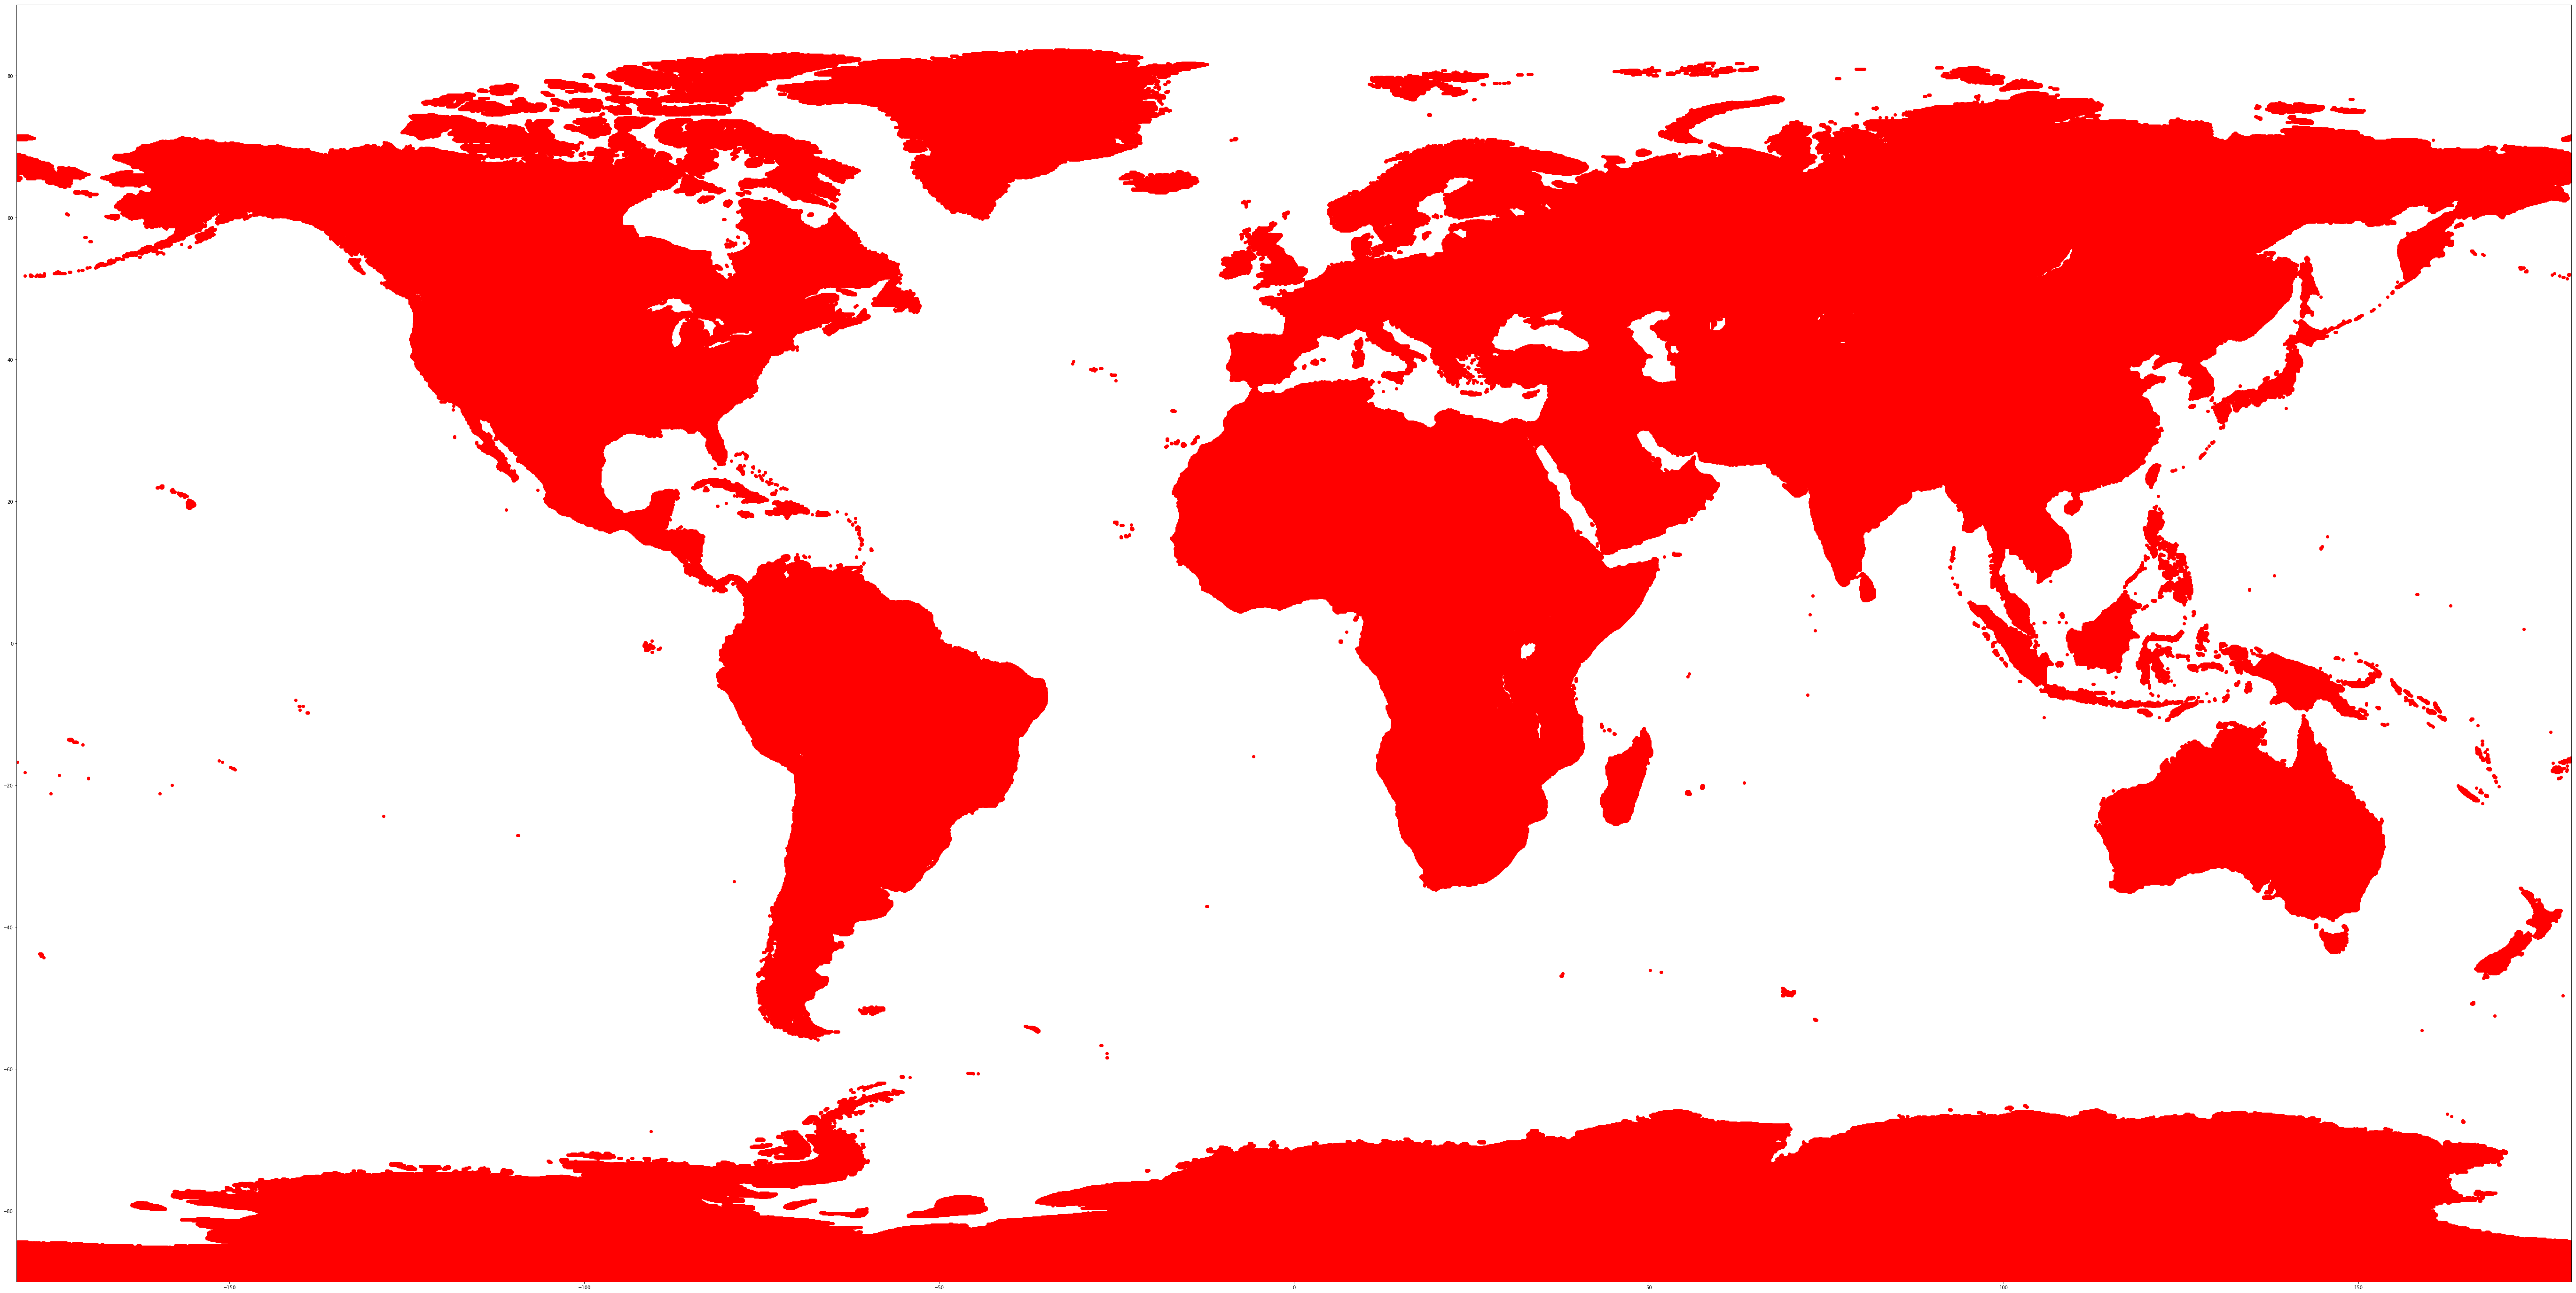

In [20]:
gdf = geopandas.GeoDataFrame(data_full, geometry='Coord')
gdf.plot(color='red', figsize = (100,50))
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

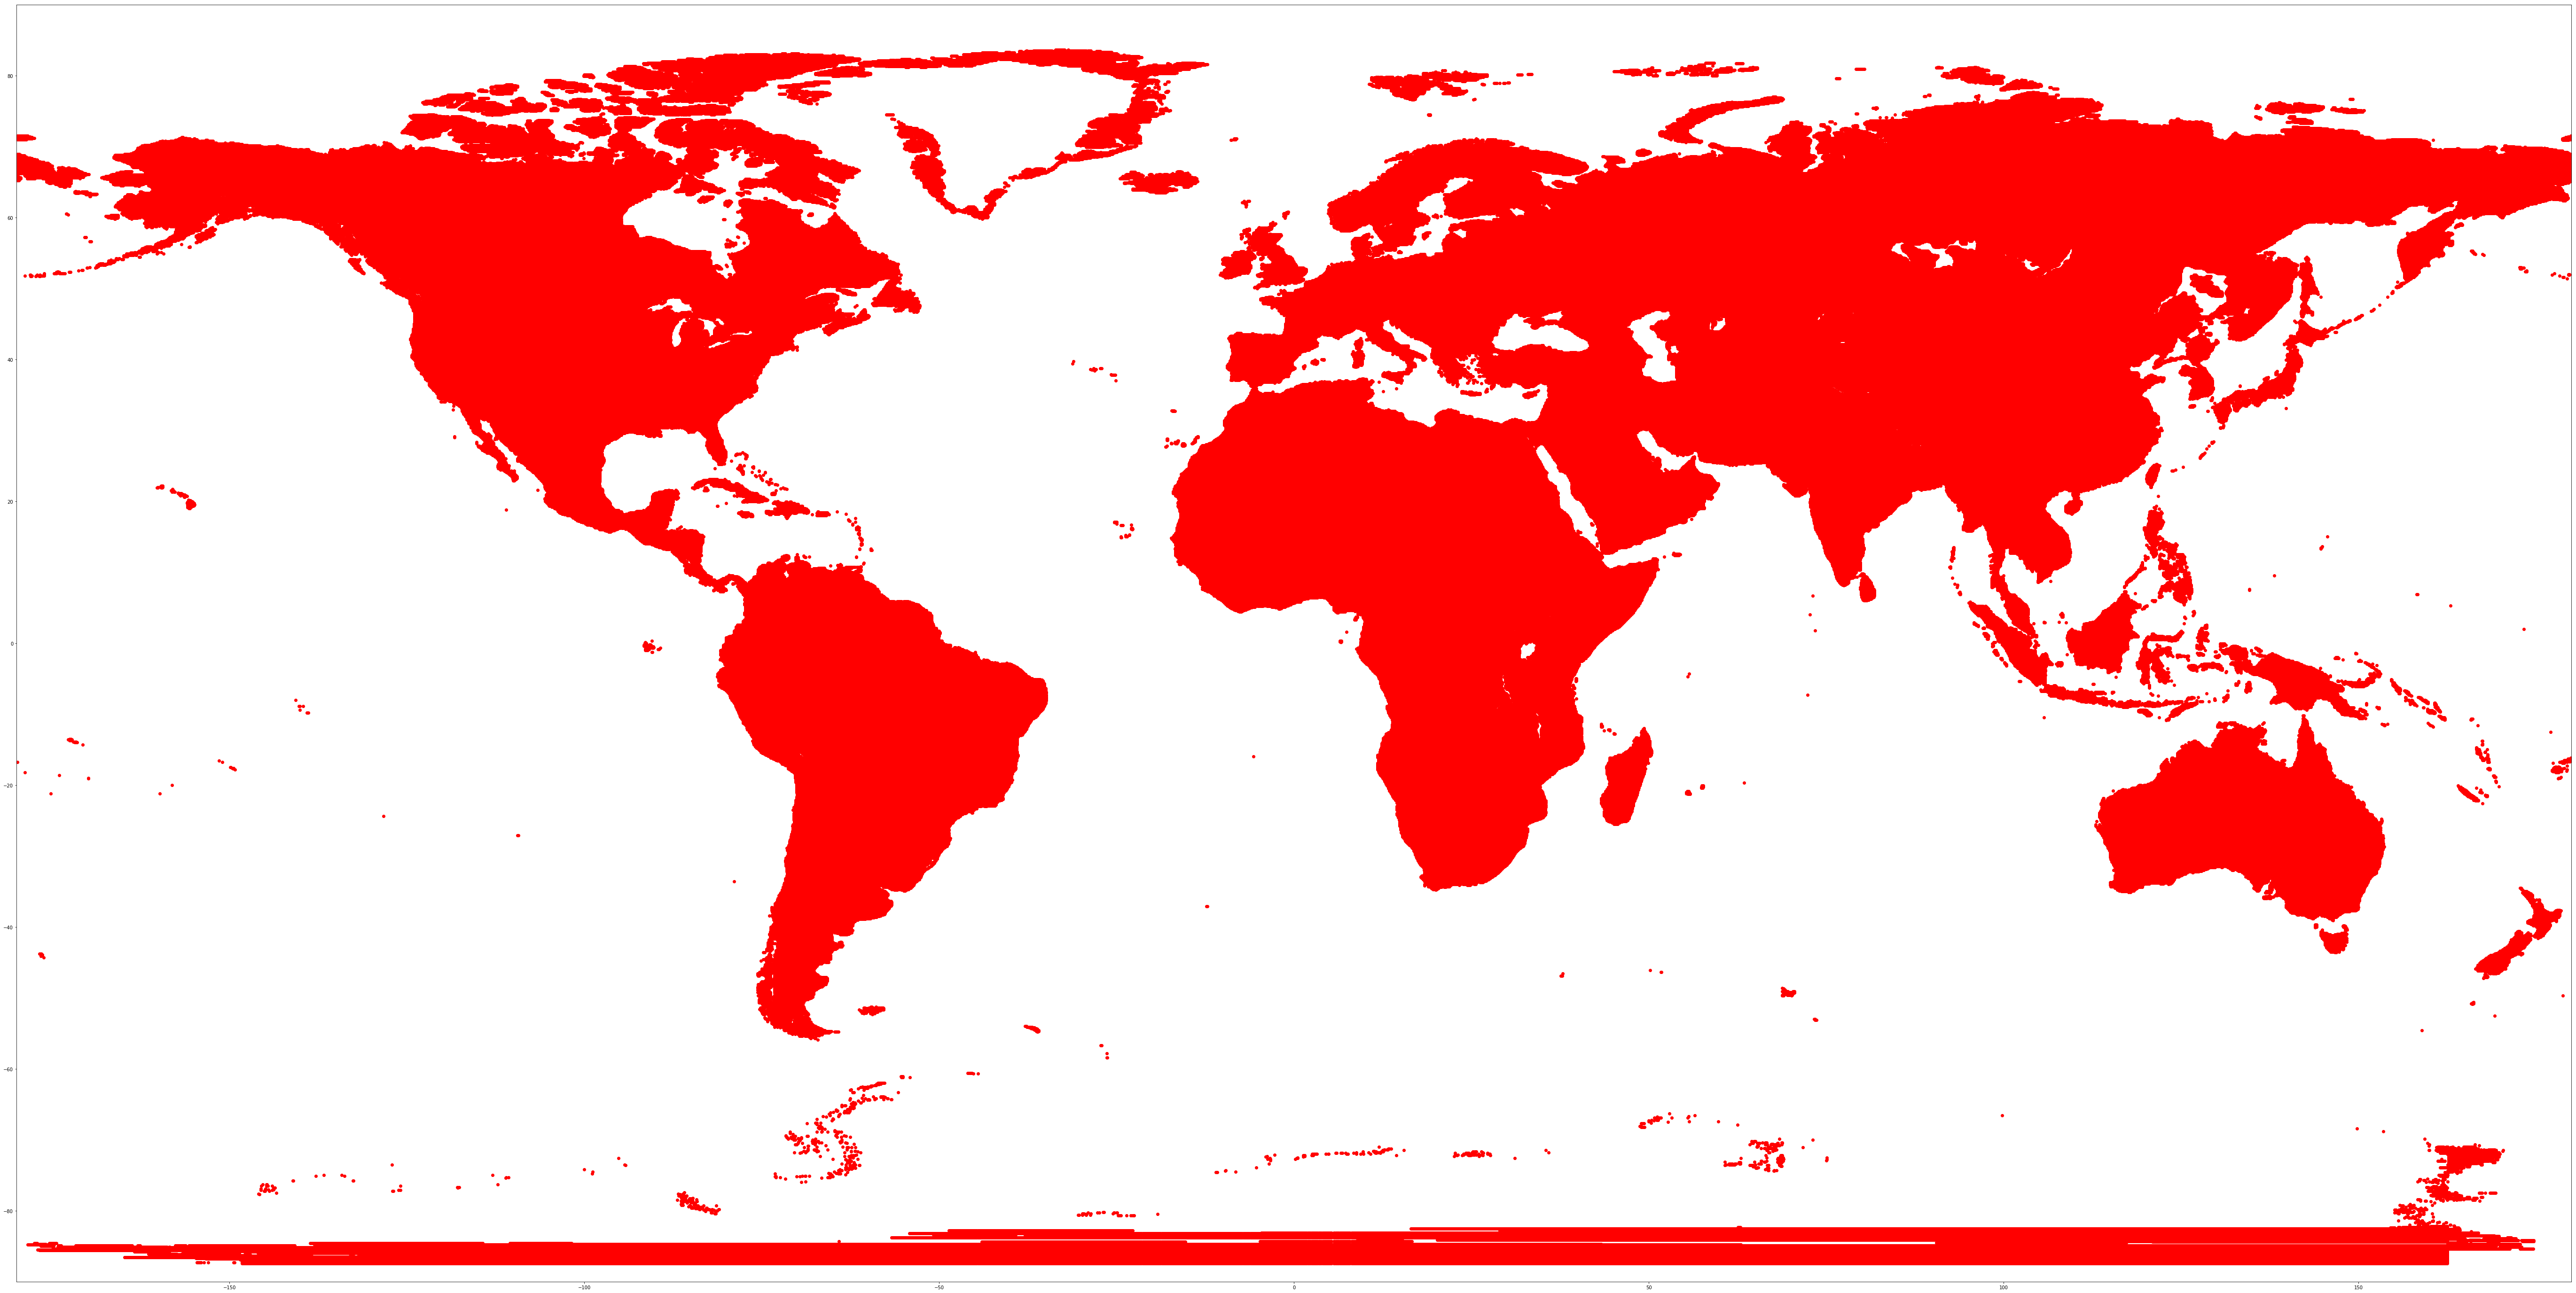

In [23]:
gdf = geopandas.GeoDataFrame(data_full.dropna(), geometry='Coord')
gdf.plot(color='red', figsize = (100,50))
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [24]:
data_full.dropna(inplace= True)

In [26]:
data_full.to_csv('/tf/Team 6 - Project/Data/Grid/Biomes_Elevation_Grid.csv',index= False)